Importamos las librerías

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Cargamos los datos 

In [ ]:
df = pd.read_csv('new_df_laliga2019_20.csv')
group_df_t = pd.read_csv('group_df_t.csv')
group_df = pd.read_csv('group_df.csv')

Miramos que estén bien

In [20]:
group_df_t.head()

,Unnamed: 0,Defender,Forward,Midfielder
0,shots,0.16,0.45,0.40
1,shots_set_pieces,0.14,0.29,0.57
2,goals,0.12,0.55,0.33
3,goals_inbox,0.12,0.57,0.30
4,goals_outbox,0.10,0.39,0.52


Realizamos transformaciones para dejarlos correctamente


In [231]:
group_df_t.rename(columns={'Unnamed: 0': 'Actions'}, inplace=True)
group_df_t.set_index('Actions', inplace=True)
group_df_t.head()

,Defender,Forward,Midfielder
Actions,,,
shots,0.16,0.45,0.40
shots_set_pieces,0.14,0.29,0.57
goals,0.12,0.55,0.33
goals_inbox,0.12,0.57,0.30
goals_outbox,0.10,0.39,0.52


In [55]:
group_df_t.columns

Index(['Defender', 'Forward', 'Midfielder'], dtype='object')

In [56]:
group_df_t.index

Index(['shots', 'shots_set_pieces', 'goals', 'goals_inbox', 'goals_outbox',
       'goals_headed', 'passes', 'short_pass', 'long_pass', 'pass_open_play',
       'pass_own_half', 'pass_opp_half', 'pass_backward', 'pass_forward',
       'through_balls', 'assists', 'assists_second_goal', 'keypasses',
       'crosses', 'crosses_open_play', 'corners', 'crosses_corners',
       'corner_passes', 'duels', 'duels_ground', 'duels_aerial', 'dribbles',
       'tackles', 'interceptions', 'recoveries', 'blocks'],
      dtype='object', name='Actions')

Correlación entre chutes y goles

In [171]:
df[['shots','goals']].corr()

,shots,goals
shots,1.000000,0.840428
goals,0.840428,1.000000


Creamos un dataset para cada posición

In [111]:
defender = df[df.position == 'Defender']
forward = df[df.position == 'Forward']
midfielder = df[df.position == 'Midfielder']

Miramos la correlación de chutes y goles por posiciones

In [172]:
defender[['shots','goals']].corr()

,shots,goals
shots,1.000000,0.432384
goals,0.432384,1.000000


In [173]:
forward[['shots','goals']].corr()

,shots,goals
shots,1.000000,0.869361
goals,0.869361,1.000000


In [174]:
midfielder[['shots','goals']].corr()

,shots,goals
shots,1.000000,0.728143
goals,0.728143,1.000000


Realizamos múltiples gráficos en una misma imagen

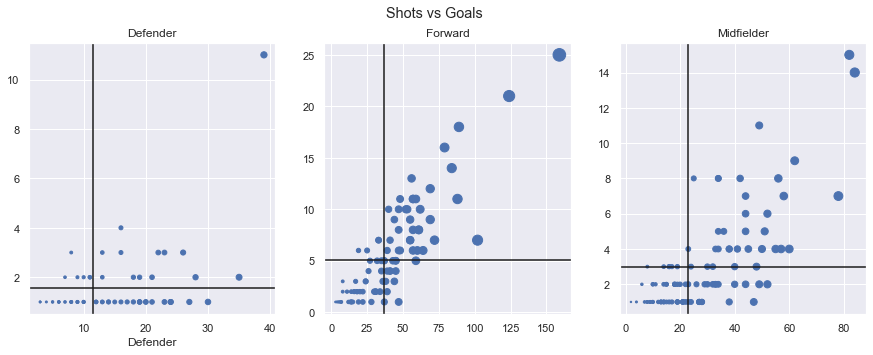

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax[0].scatter(x=defender.shots, y=defender.goals, s=defender.shots)
ax[0].set_title('Defender')
ax[0].set_xlabel('Defender')
ax[0].axvline(defender.shots.mean(), 0, 160, c='k')
ax[0].axhline(defender.goals.mean(), 0, 26, c='k')

ax[1].scatter(x=forward.shots, y=forward.goals, s=forward.shots)
ax[1].set_title('Forward')
ax[1].axvline(forward.shots.mean(), 0, 160, c='k')
ax[1].axhline(forward.goals.mean(), 0, 26, c='k')

ax[2].scatter(x=midfielder.shots, y=midfielder.goals, s=midfielder.shots)
ax[2].set_title('Midfielder')
ax[2].axvline(midfielder.shots.mean(), 0, 160, c='k')
ax[2].axhline(midfielder.goals.mean(), 0, 26, c='k')

fig.suptitle('Shots vs Goals')

plt.show()

Realizamos un gráfico de barras

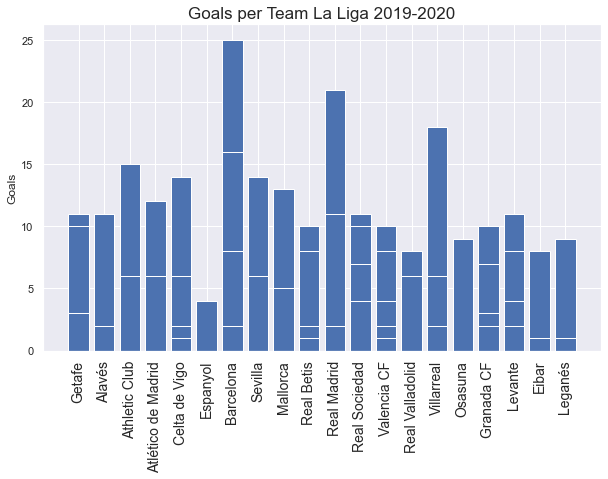

In [15]:
plt.figure(figsize=(10,6))
plt.bar(df.team, df.goals)
plt.xticks(rotation=90, fontsize=14)
plt.title('Goals per Team La Liga 2019-2020', fontsize=17)
plt.ylabel('Goals')
plt.show()

Ordenamos el dataset y realizamos un gráfico de barras horizontal

In [175]:
group_df_t.sort_values(by='Defender',ascending=True , inplace=True)
group_df_t.head()

,Defender,Forward,Midfielder
Actions,,,
corner_passes,0.07,0.18,0.75
crosses_corners,0.10,0.15,0.75
corners,0.10,0.16,0.74
goals_outbox,0.10,0.39,0.52
goals,0.12,0.55,0.33


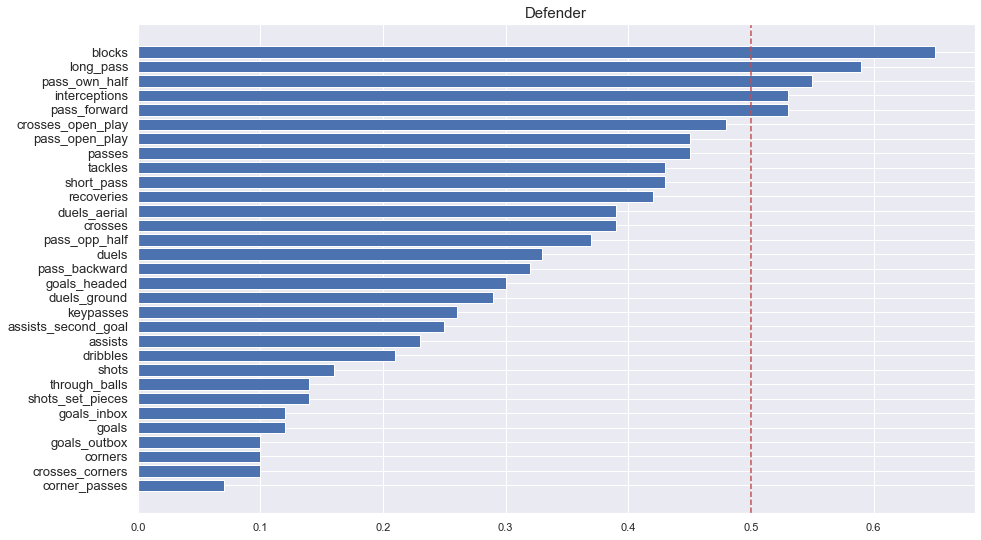

In [176]:
plt.figure(figsize=(15,9))
plt.barh(group_df_t.index, group_df_t.Defender)
plt.title('Defender', fontsize=15)
plt.yticks(fontsize=13)
plt.axvline(x=0.5, ls='--', color='r')
plt.show()

In [159]:
def visualization_skils(col, threshold):
  
    # Ordenamos el dataset en función de una posición
    group_df_t.sort_values(col, ascending=True, inplace=True)

    # Realizamos el gráfico
    fig, ax = plt.subplots(figsize=(15,9))
    ax.barh(group_df_t.index, group_df_t[col])
    ax.axvline(x=threshold, ls='--', color='r')
    plt.show()

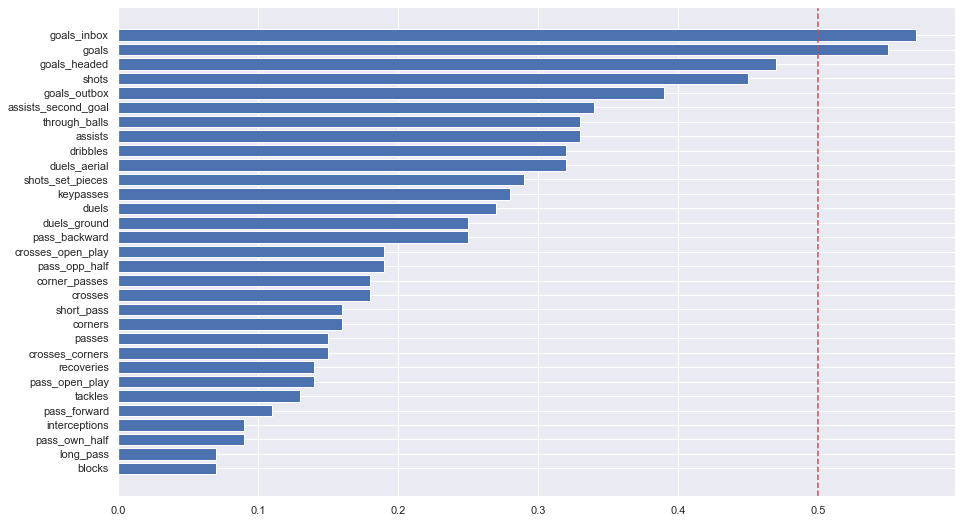

In [160]:
visualization_skils('Forward', 0.5)

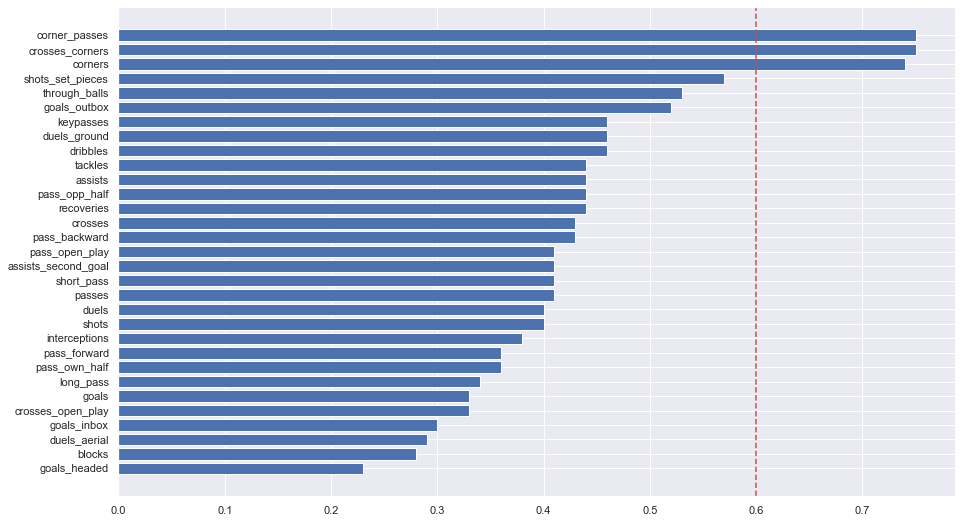

In [121]:
visualization_skils('Midfielder', 0.6)

Creamos una app interactiva

In [177]:
def graf_positions(df, ncols, threshold): 
    
    # Graficamos una posición
    if ncols == 1:
        col = input('¿Que posición quieres analizar ? ')
        visualization_skils(col, threshold)
    
    # Graficamos dos posiciones
    elif ncols == 2: 
        cols = input('¿Qué dos posiciones quieres comparar ? ').split(', ')
        df = df[cols]
        df.sort_values(cols[0], ascending=True, inplace=True)
        fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=(30,12), sharey=False)
        fig.subplots_adjust(wspace=0.3)
        
        
        for n in range(ncols):
            ax[n].barh(df.index, df[cols[n]])
            ax[n].set_title(cols[n])
            ax[n].axvline(x=threshold, ls='--', color='r')
        plt.show()
     
    # Graficamos todas las posiciones.
    else:
        order = input('¿En función de que posición quieres ordenar los datos ? ')
        fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=(30,12), sharey=False)
        fig.subplots_adjust(wspace=0.3)
        cols = df.columns
        df.sort_values(order, ascending=True, inplace=True)
        
        for n in range(ncols):
            ax[n].barh(df.index, df[cols[n]])
            ax[n].set_title(cols[n], fontsize=15)
            ax[n].axvline(x=threshold, ls='--', color='r')
        
        plt.show()

¿Que posición quieres analizar ? Defender


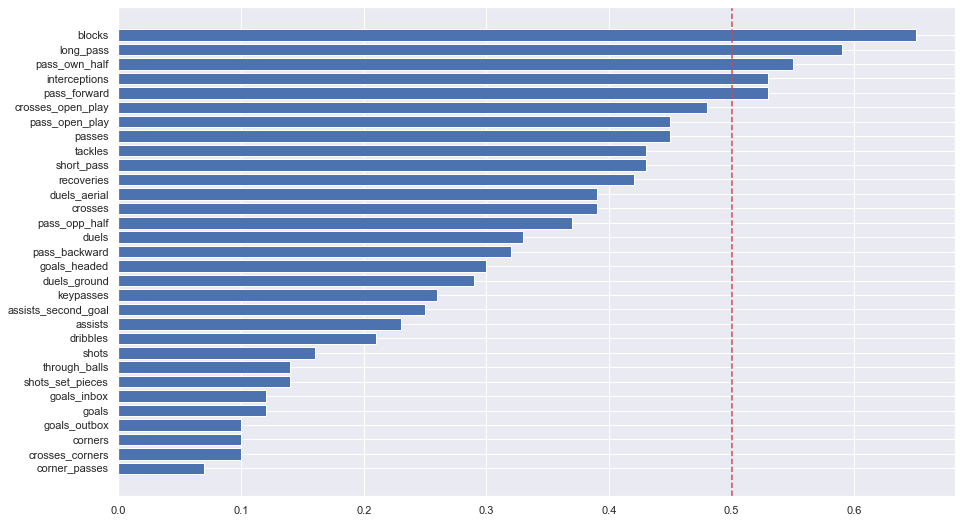

In [178]:
graf_positions(group_df_t, 1, 0.5)

Creamos la función para realizar un radar chart

In [193]:
def radar_chart(df, *col):
    
    labels = df.index.values
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    
    fig=plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, polar=True)
    ax.set_thetagrids(angles * 180/np.pi, labels, fontsize=15)

    
    for i in range(len(col)):
        
        col = list(col)
        df = df[col]
        values = df[col[i]].values

        ax.plot(angles, values, '-', linewidth=2,label=col[i])
        ax.fill(angles, values, alpha=0.25)
        
    plt.legend(title='Positions', loc='upper right',bbox_to_anchor=(0.6, 0, 0.6, 1))
    plt.show()

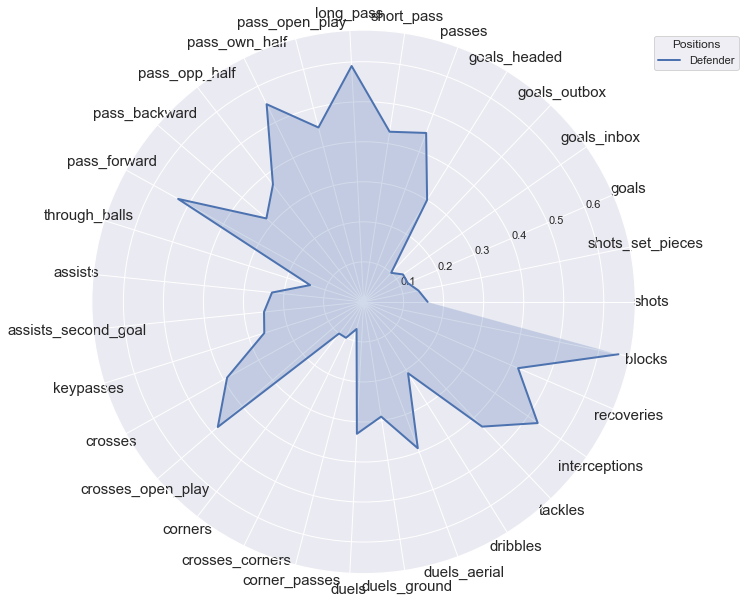

In [199]:
radar_chart(group_df_t, 'Defender')

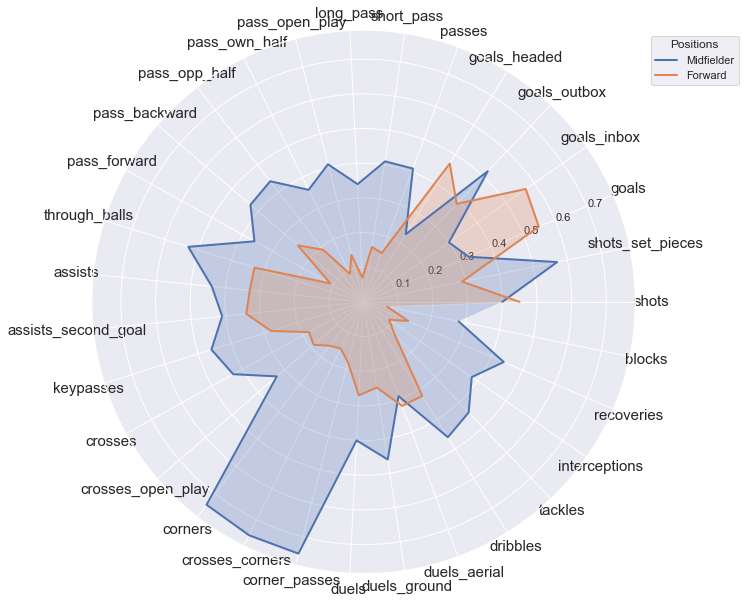

In [200]:
radar_chart(group_df_t, 'Midfielder', 'Forward')

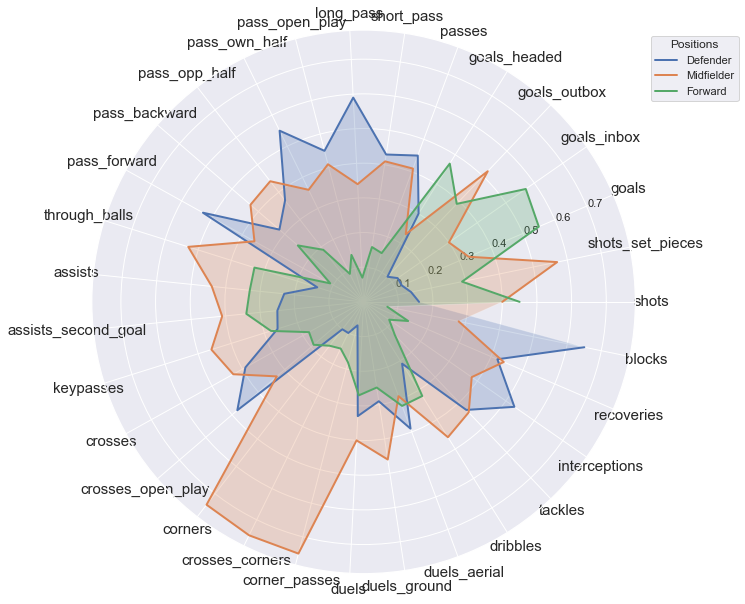

In [201]:
radar_chart(group_df_t, 'Defender', 'Midfielder', 'Forward')

Creamos la función para graficar múltiples gráficos de pastel 

In [224]:
def pie(df, ncols, *cols):
    
    # Grafico para solo una variable
    if ncols == 1:
        col = cols[0]
        values=df[col].values
        position=df.position.values
        idx = list(values).index(values.max())
        explode=[0,0,0]
        explode[idx] = 0.1
        plt.figure(figsize=(8,8))
        plt.pie(values, labels=position,explode=explode,autopct='%1.1f%%', shadow=True, startangle=90)
        plt.title(col)

        return plt.show()

    # Utilizamos la función subplots para hacer diferentes gráficos para cada variable 
    fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=(30,10), sharey=False)
    fig.subplots_adjust(wspace=0.1)
    cols = cols 

    # Iteramos a través del numero de cols para poder ir añadiendo cada gráfico 
    for n in range(ncols):
        values=df[cols[n]].values
        position=df.position.values
        idx = list(values).index(values.max())
        explode=[0,0,0]
        explode[idx] = 0.1
        ax[n].pie(values, explode=explode,autopct='%1.1f%%', shadow=True, startangle=90,textprops={'size': 'x-large'})
        ax[n].set_title(cols[n], fontsize=25)
    plt.legend(position)
    plt.show() 

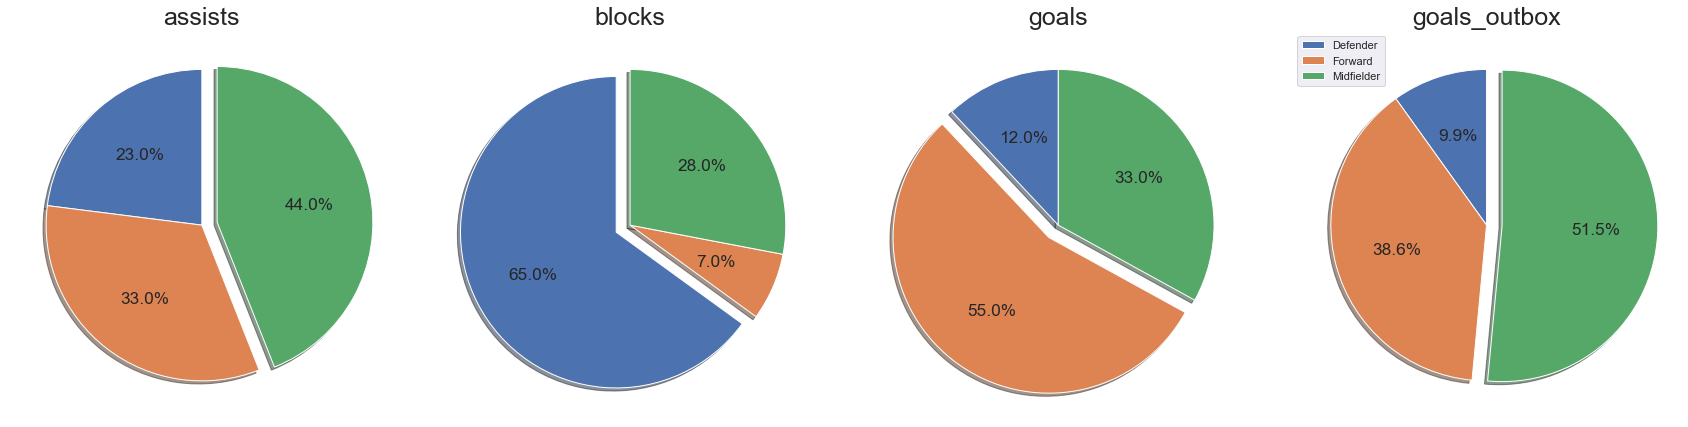

In [230]:
pie(group_df, 4, 'assists','blocks', 'goals','goals_outbox')